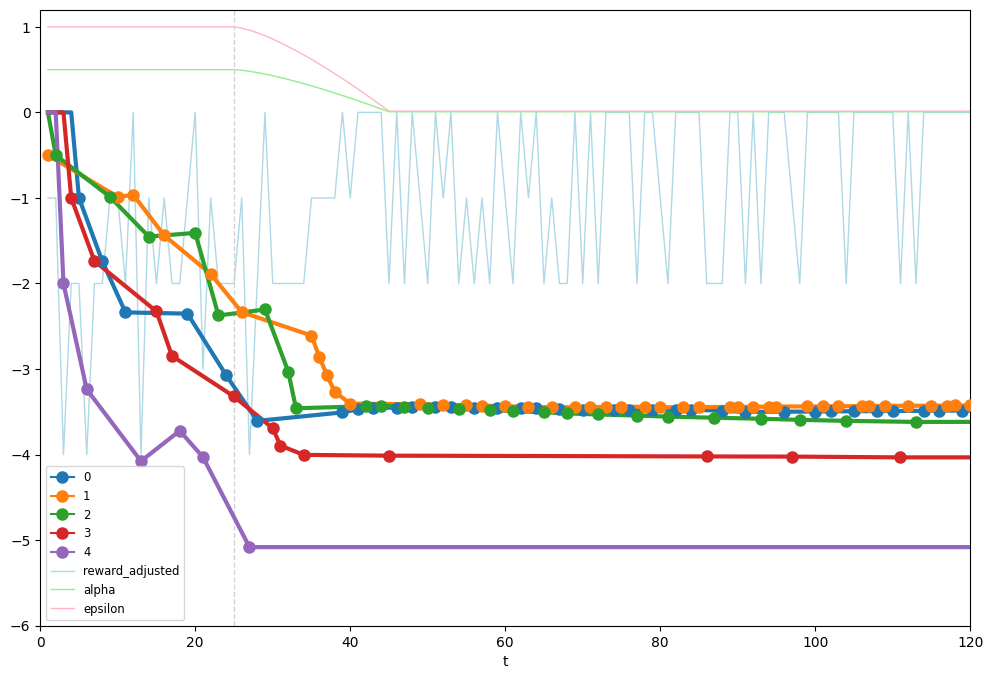

In [10]:
# This will start live plotting the newest log file

# project_path = r'/Users/schnuckiputz/other/git'

import os
import glob
import time
from IPython import display

import matplotlib.pyplot as plt
import pandas as pd

from log_plotting import plot_q_learning


current_path = os.getcwd()
list_of_files = glob.glob(os.path.join(current_path, 'rl', 'logs', '*'))

if list_of_files:
    log_filename = max(list_of_files, key=os.path.getctime)
else:
    raise FileNotFoundError("No log files found in the specified directory.")

log_filename = max(list_of_files, key=os.path.getctime)

max_steps = 120


fig, ax = plt.subplots(figsize=(12, 8))


while True:
    try:
        df = pd.read_csv(log_filename, header=0)
    except PermissionError as e:
        print(f"PermissionError: {e}")
        break
    
    df_plot = df
    
    # Clear previous axis, otherwise it starts adding new colors
    ax.clear()
    ax.set_xlim(0, max_steps)
    ax.set_ylim(-6, 1.2)
    
    plot_q_learning(df_plot, fig, ax)
    
    display.clear_output(wait=True)
    display.display(fig)
    plt.close(fig)

    time.sleep(0.1)

    if len(df) >= max_steps:
        break
